In [1]:
%pylab inline

from matplotlib.mlab import griddata
from PyTools import nbins
from scipy.ndimage.filters import gaussian_filter
import paper_style, os

Populating the interactive namespace from numpy and matplotlib


In [2]:
if "paper_style" in dir():
    od = os.path.expandvars("$HOME/Documents/Papers/photofit_near_paper/")
else:
    od = ""

In [3]:
u_obs, g_obs, r_obs, i_obs, z_obs, redshift = loadtxt("../inputs/total_photometry.txt", usecols=range(1, 6)+[11], unpack=True)
u_obf, g_obf, r_obf, i_obf, z_obf, rs_sam = loadtxt("../outputs/real_deal6/ugriz_catalog_of.txt", usecols=range(1, 6)+[11], unpack=True)
u_ref, g_ref, r_ref, i_ref, z_ref = loadtxt("../outputs/real_deal6/ugriz_catalog_rf.txt", usecols=range(1, 6), unpack=True)

u_lib, g_lib, r_lib, i_lib, z_lib, Z = loadtxt("../inputs/set3_catalog.txt", usecols=range(39, 39 + 5)+[12], unpack=True)

In [4]:
zmask = redshift < 0.03
ocolor_x = (u_obs - g_obs)[zmask]
ocolor_y = (g_obs - r_obs)[zmask]
icolor_x = (u_obf - g_obf)
icolor_y = (g_obf - r_obf)
kcolor_x = (u_ref - g_ref)
kcolor_y = (g_ref - r_ref)
lcolor_x = (u_lib - g_lib)[log10(Z)>=-0.4]
lcolor_y = (g_lib - r_lib)[log10(Z)>=-0.4]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in subtract


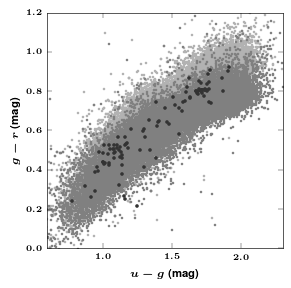

In [10]:
xlm = array((0.6, 2.3))
ylm = array((0.0, 1.2))
axs = subplot(111, xlim=xlm, ylim=ylm)

axs.set_xlabel(r"\bf $u-g$ (mag)")
axs.set_ylabel(r"\bf $g-r$ (mag)")

axs.scatter(icolor_x, icolor_y, lw=0, c="0.7", s=4)
axs.scatter(kcolor_x, kcolor_y, lw=0, c="0.5", s=4)
axs.scatter(lcolor_x, lcolor_y, lw=0, c="0.2", s=8)

savefig(od + "samples")